# Second Hand Car Price Prediction

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/User/Msc Codes/DataStics/Data/data.csv")
df.head()

,name,year,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,selling_price
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,450000
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,370000
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0,158000
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0,225000
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0,130000


In [3]:
print(df['name'].unique())
print(df['fuel'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())

['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Hyundai i20 2015-2017 Magna'
 'Volkswagen Polo IPL II 1.2 Petrol Highline' 'Tata Bolt Revotron XT']
['Diesel' 'Petrol' 'LPG' 'CNG' 'Electric']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14140 entries, 0 to 14139
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           14140 non-null  object 
 1   year           14140 non-null  int64  
 2   km_driven      14140 non-null  int64  
 3   fuel           14140 non-null  object 
 4   transmission   14140 non-null  object 
 5   owner          14140 non-null  object 
 6   mileage        13924 non-null  object 
 7   engine         13890 non-null  object 
 8   max_power      13899 non-null  object 
 9   seats          13887 non-null  float64
 10  selling_price  14140 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 1.2+ MB


#### checking null values

In [5]:
df.isnull().sum()

name               0
year               0
km_driven          0
fuel               0
transmission       0
owner              0
mileage          216
engine           250
max_power        241
seats            253
selling_price      0
dtype: int64

#### remoing data which contains NA values 


In [6]:
df.dropna(axis = 0, how ='any', inplace=True) 

In [7]:
df.shape

(13885, 11)

#### checking null values

In [8]:
df.isnull().sum()

name             0
year             0
km_driven        0
fuel             0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
selling_price    0
dtype: int64

#### checking for duplicate values

In [9]:
print("There is {} duplicated values in data frame".format(df.duplicated().sum()))

There is 1193 duplicated values in data frame


In [10]:
df.drop_duplicates(keep=False,inplace=True)

In [11]:
print("There is {} duplicated values in data frame".format(df.duplicated().sum()))

There is 0 duplicated values in data frame


In [12]:
df.shape

(12077, 11)

#### cleaning seats column

In [13]:
df.seats.value_counts()

5.0     9777
7.0     1551
8.0      342
4.0      213
6.0       81
9.0       71
10.0      22
2.0       18
0.0        1
14.0       1
Name: seats, dtype: int64

In [14]:
print(df.seats.dtype)
  
# converting 'seats' from float to int 
df['seats'] = df['seats'].astype(int) 

print(df.seats.dtype)
  

float64
int32


5     9777
7     1551
8      342
4      213
6       81
9       71
10      22
2       18
0        1
14       1
Name: seats, dtype: int64


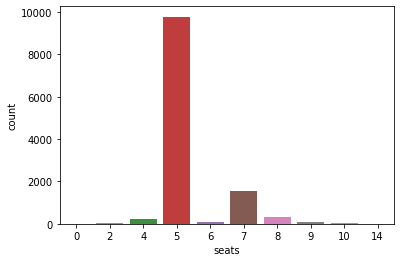

In [15]:
sns.countplot(x='seats',data=df)
print(df.seats.value_counts())

In [16]:
# hr we r droping dataset consisting no of seats as 2 and 14
print(df[(df.seats == 2) | (df.seats == 14) | (df.seats == 0)])

df.drop(df[(df.seats == 2) | (df.seats == 14) | (df.seats == 0)].index, inplace = True)

print(df[(df.seats == 2) | (df.seats == 14) | (df.seats == 0)])

                                          name  year  km_driven    fuel  \
4574   Tata Winger Deluxe - Flat Roof (Non-AC)  2010      50000  Diesel   
5899            Mahindra Bolero Pik-Up FB 1.7T  2020       5000  Diesel   
6628           Mahindra Bolero Pik-Up CBC 1.7T  2019      80000  Diesel   
8261                  Mercedes-Benz SLC 43 AMG  2017      13372  Petrol   
8684                          Audi TT 2.0 TFSI  2013      12100  Petrol   
8820           Mercedes-Benz SLK-Class SLK 350  2016      22732  Petrol   
8925           Mercedes-Benz SLK-Class SLK 350  2015      10000  Petrol   
9042                       Smart Fortwo CDI AT  2008     103000  Diesel   
9053                Porsche Cayman 2009-2012 S  2010      10000  Petrol   
9205               Porsche Boxster S tiptronic  2015      10512  Petrol   
9415                          Audi TT 2.0 TFSI  2014      14262  Petrol   
10221                 Mercedes-Benz SLC 43 AMG  2019       2526  Petrol   
10431     Porsche Cayman 

<AxesSubplot:xlabel='selling_price', ylabel='seats'>

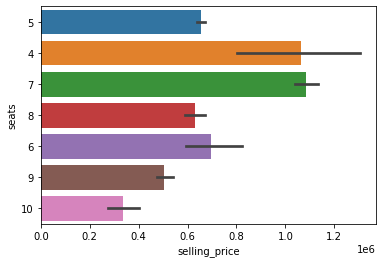

In [17]:
#seats vs price
temp = df.seats.astype(str)
sns.barplot(y=temp, x="selling_price", data=df)

#### cleaning mileage column

In [18]:
df.loc[df.mileage=='0.0 kmpl']

,name,year,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,selling_price


In [19]:
df.loc[df.mileage=='0.0 km/kg']

,name,year,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,selling_price


In [20]:
df['mileage']=df.mileage.str.extract(r'(\d+.\d+)').astype('float')

In [21]:
df['mileage'].values

array([23.4 , 21.14, 17.7 , ..., 14.  , 18.9 , 25.44])

#### cleaning engine column

In [22]:
df['engine']=df.engine.str.extract(r'(\d+.\d+)').astype('int')

In [23]:
df['engine'].values

array([1248, 1498, 1497, ..., 2498,  998,  936])

<AxesSubplot:xlabel='count', ylabel='engine'>

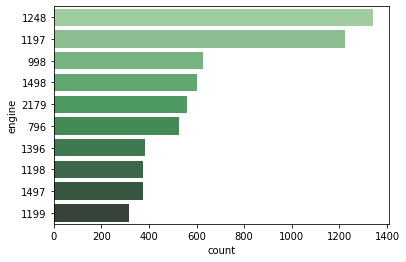

In [24]:
sns.countplot(y="engine", data=df, palette="Greens_d",
              order=df.engine.value_counts().iloc[:10].index)

In [25]:
print(df.engine.dtypes)

int32


#### cleaning max_power column

In [26]:
df['max_power'] = df['max_power'].str.split(' ').str[0]

In [27]:
df['max_power'] = df['max_power'].astype('float')

<AxesSubplot:xlabel='count', ylabel='max_power'>

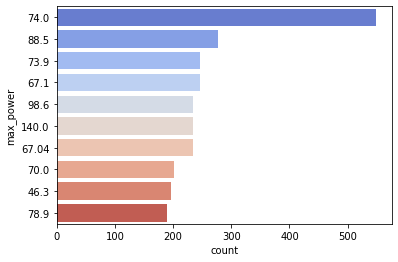

In [28]:
sns.countplot(y="max_power", data=df, palette="coolwarm",
              order=df.max_power.value_counts().iloc[:10].index)

In [29]:
print(df.max_power.dtypes)

float64


#### cleaning owner column

In [30]:
df.owner.value_counts()

First Owner             7546
Second Owner            3332
Third Owner              886
Fourth & Above Owner     285
Test Drive Car             8
Name: owner, dtype: int64

First Owner             62.586050
Second Owner            27.635399
Third Owner              7.348428
Fourth & Above Owner     2.363772
Test Drive Car           0.066351
Name: owner, dtype: float64


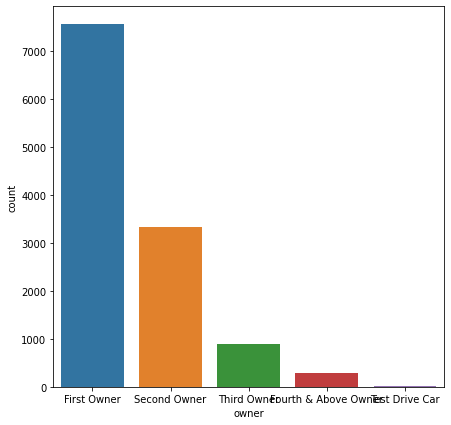

In [31]:
fig_dims = (7, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='owner',data=df)
print(df.owner.value_counts(normalize=True)*100)

In [32]:
# hr we r droping dataset consisting of owner as "test drive car"
print(df[df['owner'] == 'Test Drive Car'])
df.drop(df[df['owner'] == 'Test Drive Car'].index, inplace = True) 
print(df[df['owner'] == 'Test Drive Car'])

                                         name  year  km_driven    fuel  \
4382   Volkswagen Vento 1.5 TDI Highline BSIV  2019       5400  Diesel   
4949                   Audi A6 35 TFSI Matrix  2019       7800  Petrol   
4950                   Audi A6 35 TFSI Matrix  2019      11500  Petrol   
4951                   Audi A6 35 TFSI Matrix  2019      23600  Petrol   
6219                           Honda Civic ZX  2019      24857  Petrol   
12508                      Hyundai i10 Sportz  2016      19947  Petrol   
13072             Ford Aspire Titanium Diesel  2017      60048  Diesel   
13073                      Hyundai i10 Sportz  2009      48000  Petrol   

      transmission           owner  mileage  engine  max_power  seats  \
4382        Manual  Test Drive Car    22.27    1498     108.60      5   
4949     Automatic  Test Drive Car    15.26    1798     187.74      5   
4950     Automatic  Test Drive Car    15.26    1798     187.74      5   
4951     Automatic  Test Drive Car    15.

In [33]:
df.owner = df.owner.map({'First Owner': 1, 'Second Owner': 2,'Third Owner': 3, 'Fourth & Above Owner': 4})

In [34]:
print(df.owner.dtypes)

int64


1    62.627604
2    27.653747
3     7.353307
4     2.365342
Name: owner, dtype: float64


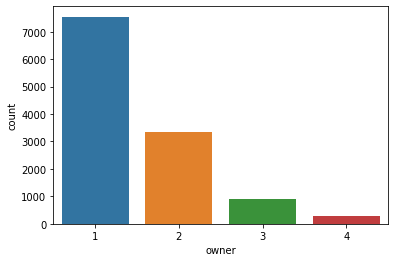

In [35]:
sns.countplot(x='owner',data=df)
print(df.owner.value_counts(normalize=True)*100)

#### cleaning transmission column

In [36]:
df.transmission.value_counts()

Manual       9901
Automatic    2148
Name: transmission, dtype: int64

Manual       82.172794
Automatic    17.827206
Name: transmission, dtype: float64


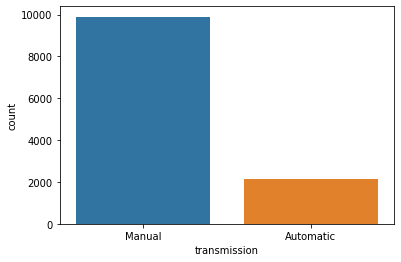

In [37]:
sns.countplot(x='transmission',data=df)
print(df.transmission.value_counts(normalize=True)*100)

In [38]:
df.transmission = df.transmission.map({'Manual': 0, 'Automatic': 1})

In [39]:
print(df.transmission.dtypes)

int64


#### cleaning year column

In [40]:
df.year.value_counts()

2015    1354
2016    1354
2014    1334
2017    1296
2013    1157
2012    1103
2011     962
2018     794
2010     687
2009     412
2019     384
2008     354
2007     280
2006     177
2005     119
2004      76
2020      53
2003      50
2002      32
2000      18
1999      14
2001      13
1998      12
1997       9
1996       2
1994       2
1995       1
Name: year, dtype: int64

In [41]:
df['Current Year']=2020

In [42]:
df['no_year']=df['Current Year']- df['year']

In [43]:
# Droping year column 
df.drop(['year'],axis=1,inplace=True)
df.drop(['Current Year'],axis=1,inplace=True)

In [44]:
df.head()

,name,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,selling_price,no_year
0,Maruti Swift Dzire VDI,145500,Diesel,0,1,23.40,1248,74.00,5,450000,6
1,Skoda Rapid 1.5 TDI Ambition,120000,Diesel,0,2,21.14,1498,103.52,5,370000,6
2,Honda City 2017-2020 EXi,140000,Petrol,0,3,17.70,1497,78.00,5,158000,14
3,Hyundai i20 Sportz Diesel,127000,Diesel,0,1,23.00,1396,90.00,5,225000,10
4,Maruti Swift VXI BSIII,120000,Petrol,0,1,16.10,1298,88.20,5,130000,13


#### cleaning selling_price column

In [45]:
#df[df.selling_price == 29999]
print("minimum selling price in lakh : ",df.selling_price.min())
print("average selling price in lakh  : ",df.selling_price.mean())
print("maximum selling price in lakh  : ",df.selling_price.max())

minimum selling price in lakh :  29999
average selling price in lakh  :  712807.6360693834
maximum selling price in lakh  :  9707000


In [46]:
# dropping rows where sellin_price is below 1L
print(df[df.selling_price < 100000])
df.drop(df[df['selling_price'] < 100000].index, inplace = True)
print(df[df.selling_price < 100000])

                                   name  km_driven    fuel  transmission  \
6          Maruti Wagon R LXI DUO BSIII     175000     LPG             0   
7                    Maruti 800 DX BSII       5000  Petrol             0   
11                        Maruti Zen LX     100000  Petrol             0   
176                      Maruti 800 Std      40000  Petrol             0   
190                      Maruti Zen LXI      90000  Petrol             0   
...                                 ...        ...     ...           ...   
14038                Hyundai Accent GLE      50000  Petrol             0   
14048                Maruti 800 DX BSII      78000  Petrol             0   
14097           Maruti Wagon R LX BSIII      65771  Petrol             0   
14107                  Hyundai Getz GLS     100000  Petrol             0   
14111  Tata New Safari DICOR 2.2 VX 4x2      86000  Diesel             0   

       owner  mileage  engine  max_power  seats  selling_price  no_year  
6          1 

In [47]:
# dropping rows where sellin_price is above 20L
print(df[df.selling_price > 2000000])
df.drop(df[df['selling_price']  > 2000000].index, inplace = True)
print(df[df.selling_price  > 2000000])

                                       name  km_driven    fuel  transmission  \
139              BMW X4 M Sport X xDrive20d       7500  Diesel             1   
141    Mercedes-Benz E-Class E250 Edition E      35000  Diesel             1   
146          Audi Q7 35 TDI Quattro Premium      53000  Diesel             1   
148         Mercedes-Benz S-Class S 350 CDI      47000  Diesel             1   
167           BMW 5 Series 520d Luxury Line      12000  Diesel             1   
...                                     ...        ...     ...           ...   
14067   BMW 5 Series 2013-2017 530d M Sport      16000  Diesel             1   
14071                       Audi Q3 2.0 TDI      65630  Diesel             1   
14091     Mercedes-Benz GLA Class 200 Sport      17773  Petrol             1   
14117            Jaguar XF 2.2 Litre Luxury      31150  Diesel             1   
14129               Porsche Panamera Diesel      40000  Diesel             1   

       owner  mileage  engine  max_powe

In [48]:
df.shape

(10974, 11)

#### cleaning name column

In [49]:
# spliting company name from name feature 
part = df['name'].str.partition()
df['company'] = part[0]
df.head()

,name,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,selling_price,no_year,company
0,Maruti Swift Dzire VDI,145500,Diesel,0,1,23.40,1248,74.00,5,450000,6,Maruti
1,Skoda Rapid 1.5 TDI Ambition,120000,Diesel,0,2,21.14,1498,103.52,5,370000,6,Skoda
2,Honda City 2017-2020 EXi,140000,Petrol,0,3,17.70,1497,78.00,5,158000,14,Honda
3,Hyundai i20 Sportz Diesel,127000,Diesel,0,1,23.00,1396,90.00,5,225000,10,Hyundai
4,Maruti Swift VXI BSIII,120000,Petrol,0,1,16.10,1298,88.20,5,130000,13,Maruti


In [50]:
print('dtype of company column',df.company.dtypes)
print('unique company names: ',df.company.nunique())

dtype of company column object
unique company names:  31


In [51]:
# spliting car_name from name feature
part =df['name'].str.partition()
df['car_name'] = part[2]
df.head()

,name,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,selling_price,no_year,company,car_name
0,Maruti Swift Dzire VDI,145500,Diesel,0,1,23.40,1248,74.00,5,450000,6,Maruti,Swift Dzire VDI
1,Skoda Rapid 1.5 TDI Ambition,120000,Diesel,0,2,21.14,1498,103.52,5,370000,6,Skoda,Rapid 1.5 TDI Ambition
2,Honda City 2017-2020 EXi,140000,Petrol,0,3,17.70,1497,78.00,5,158000,14,Honda,City 2017-2020 EXi
3,Hyundai i20 Sportz Diesel,127000,Diesel,0,1,23.00,1396,90.00,5,225000,10,Hyundai,i20 Sportz Diesel
4,Maruti Swift VXI BSIII,120000,Petrol,0,1,16.10,1298,88.20,5,130000,13,Maruti,Swift VXI BSIII


In [52]:
print('dtype of car_name column',df.car_name.dtypes)
print('unique car_name names: ',df.car_name.nunique())

dtype of car_name column object
unique car_name names:  2553


In [53]:
# droping name column
df.drop(['name'], axis = 1, inplace = True) 

In [54]:
df.head()

,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,selling_price,no_year,company,car_name
0,145500,Diesel,0,1,23.40,1248,74.00,5,450000,6,Maruti,Swift Dzire VDI
1,120000,Diesel,0,2,21.14,1498,103.52,5,370000,6,Skoda,Rapid 1.5 TDI Ambition
2,140000,Petrol,0,3,17.70,1497,78.00,5,158000,14,Honda,City 2017-2020 EXi
3,127000,Diesel,0,1,23.00,1396,90.00,5,225000,10,Hyundai,i20 Sportz Diesel
4,120000,Petrol,0,1,16.10,1298,88.20,5,130000,13,Maruti,Swift VXI BSIII


In [55]:
# checking if company column contains any invalid data
df.company.unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Mercedes-Benz', 'Mitsubishi',
       'Audi', 'Volkswagen', 'Nissan', 'MG', 'BMW', 'Daewoo', 'Datsun',
       'Kia', 'Jeep', 'Fiat', 'Land', 'Volvo', 'Ashok', 'Force',
       'Ambassador', 'Isuzu', 'Porsche', 'Mini', 'Jaguar'], dtype=object)

In [56]:
# checking if car_name column contains any invalid data
df.car_name.value_counts()

Swift Dzire VDI            142
Swift VDI                  104
Alto 800 LXI                90
Alto LXi                    83
XUV500 W8 2WD               70
                          ... 
Ritz VDI (ABS) BS IV         1
Laura RS                     1
Xylo E8 ABS Airbag BSIV      1
Linea 1.3 Emotion            1
Jazz Mode                    1
Name: car_name, Length: 2553, dtype: int64

In [57]:
# Fuel type pie diagram
df['company'].value_counts()

Maruti           2941
Hyundai          2157
Mahindra          929
Honda             916
Tata              682
Toyota            638
Ford              584
Volkswagen        474
Renault           330
Chevrolet         302
Skoda             227
Nissan            156
Mercedes-Benz     156
BMW               139
Audi              101
Datsun             63
Fiat               60
Mitsubishi         32
Jeep               29
Volvo              15
Land               15
Isuzu               6
Force               5
Ambassador          3
MG                  3
Jaguar              3
Mini                2
Porsche             2
Kia                 2
Ashok               1
Daewoo              1
Name: company, dtype: int64

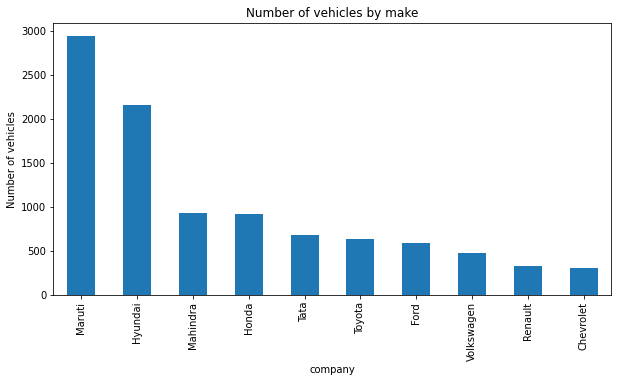

In [58]:
df.company.value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('company');

In [59]:
df.head()

,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,selling_price,no_year,company,car_name
0,145500,Diesel,0,1,23.40,1248,74.00,5,450000,6,Maruti,Swift Dzire VDI
1,120000,Diesel,0,2,21.14,1498,103.52,5,370000,6,Skoda,Rapid 1.5 TDI Ambition
2,140000,Petrol,0,3,17.70,1497,78.00,5,158000,14,Honda,City 2017-2020 EXi
3,127000,Diesel,0,1,23.00,1396,90.00,5,225000,10,Hyundai,i20 Sportz Diesel
4,120000,Petrol,0,1,16.10,1298,88.20,5,130000,13,Maruti,Swift VXI BSIII


In [60]:
df.drop(['car_name'], axis = 1, inplace = True)

In [61]:
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
df['company'] = label_encoder.fit_transform(df['company']) 
print(df.head())
print(label_encoder.classes_)


   km_driven    fuel  transmission  owner  mileage  engine  max_power  seats  \
0     145500  Diesel             0      1    23.40    1248      74.00      5   
1     120000  Diesel             0      2    21.14    1498     103.52      5   
2     140000  Petrol             0      3    17.70    1497      78.00      5   
3     127000  Diesel             0      1    23.00    1396      90.00      5   
4     120000  Petrol             0      1    16.10    1298      88.20      5   

   selling_price  no_year  company  
0         450000        6       19  
1         370000        6       26  
2         158000       14       10  
3         225000       10       11  
4         130000       13       19  
['Ambassador' 'Ashok' 'Audi' 'BMW' 'Chevrolet' 'Daewoo' 'Datsun' 'Fiat'
 'Force' 'Ford' 'Honda' 'Hyundai' 'Isuzu' 'Jaguar' 'Jeep' 'Kia' 'Land'
 'MG' 'Mahindra' 'Maruti' 'Mercedes-Benz' 'Mini' 'Mitsubishi' 'Nissan'
 'Porsche' 'Renault' 'Skoda' 'Tata' 'Toyota' 'Volkswagen' 'Volvo']


In [62]:
le_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(le_name_mapping)

{'Ambassador': 0, 'Ashok': 1, 'Audi': 2, 'BMW': 3, 'Chevrolet': 4, 'Daewoo': 5, 'Datsun': 6, 'Fiat': 7, 'Force': 8, 'Ford': 9, 'Honda': 10, 'Hyundai': 11, 'Isuzu': 12, 'Jaguar': 13, 'Jeep': 14, 'Kia': 15, 'Land': 16, 'MG': 17, 'Mahindra': 18, 'Maruti': 19, 'Mercedes-Benz': 20, 'Mini': 21, 'Mitsubishi': 22, 'Nissan': 23, 'Porsche': 24, 'Renault': 25, 'Skoda': 26, 'Tata': 27, 'Toyota': 28, 'Volkswagen': 29, 'Volvo': 30}


#### cleaning fuel column

In [63]:
df.fuel.value_counts()

Diesel    5770
Petrol    5055
CNG        106
LPG         43
Name: fuel, dtype: int64

Diesel    52.578823
Petrol    46.063423
CNG        0.965919
LPG        0.391835
Name: fuel, dtype: float64


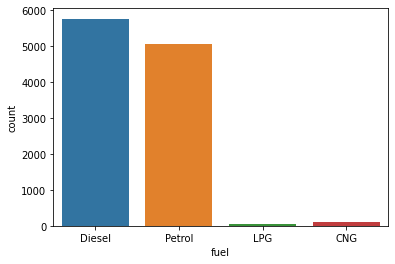

In [64]:
sns.countplot(x='fuel',data=df)
print(df.fuel.value_counts(normalize=True)*100)


In [65]:
df.head()

,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,selling_price,no_year,company
0,145500,Diesel,0,1,23.40,1248,74.00,5,450000,6,19
1,120000,Diesel,0,2,21.14,1498,103.52,5,370000,6,26
2,140000,Petrol,0,3,17.70,1497,78.00,5,158000,14,10
3,127000,Diesel,0,1,23.00,1396,90.00,5,225000,10,11
4,120000,Petrol,0,1,16.10,1298,88.20,5,130000,13,19


In [66]:
df.fuel.unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [67]:
df.fuel = df.fuel.map({'Petrol': 0, 'Diesel': 1,'LPG': 2, 'CNG': 3 })

In [68]:
df.head()

,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,selling_price,no_year,company
0,145500,1,0,1,23.40,1248,74.00,5,450000,6,19
1,120000,1,0,2,21.14,1498,103.52,5,370000,6,26
2,140000,0,0,3,17.70,1497,78.00,5,158000,14,10
3,127000,1,0,1,23.00,1396,90.00,5,225000,10,11
4,120000,0,0,1,16.10,1298,88.20,5,130000,13,19


In [69]:
df = df[['company', 'km_driven','fuel', 'transmission', 'owner','engine', 'max_power', 'seats', 'mileage',
          'no_year', 'selling_price']]

In [70]:
df.head()

,company,km_driven,fuel,transmission,owner,engine,max_power,seats,mileage,no_year,selling_price
0,19,145500,1,0,1,1248,74.00,5,23.40,6,450000
1,26,120000,1,0,2,1498,103.52,5,21.14,6,370000
2,10,140000,0,0,3,1497,78.00,5,17.70,14,158000
3,11,127000,1,0,1,1396,90.00,5,23.00,10,225000
4,19,120000,0,0,1,1298,88.20,5,16.10,13,130000


In [71]:
df.corr()

,company,km_driven,fuel,transmission,owner,engine,max_power,seats,mileage,no_year,selling_price
company,1.000000,0.099110,0.137329,-0.071237,-0.005513,0.126218,-0.064395,0.180546,-0.056397,-0.023258,0.016033
km_driven,0.099110,1.000000,0.253274,-0.082420,0.155757,0.270963,0.076657,0.227237,-0.180308,0.393483,-0.126721
fuel,0.137329,0.253274,1.000000,-0.059031,0.030842,0.362941,0.162418,0.280770,0.188235,-0.019893,0.245016
transmission,-0.071237,-0.082420,-0.059031,1.000000,-0.028930,0.268467,0.482290,-0.067405,-0.244113,-0.006376,0.435416
owner,-0.005513,0.155757,0.030842,-0.028930,1.000000,0.041737,-0.006945,0.034170,-0.093204,0.257825,-0.132346
engine,0.126218,0.270963,0.362941,0.268467,0.041737,1.000000,0.737502,0.605825,-0.631895,0.181200,0.535952
max_power,-0.064395,0.076657,0.162418,0.482290,-0.006945,0.737502,1.000000,0.207016,-0.498231,0.077797,0.673308
seats,0.180546,0.227237,0.280770,-0.067405,0.034170,0.605825,0.207016,1.000000,-0.443495,0.029988,0.228235
mileage,-0.056397,-0.180308,0.188235,-0.244113,-0.093204,-0.631895,-0.498231,-0.443495,1.000000,-0.393618,-0.209059
no_year,-0.023258,0.393483,-0.019893,-0.006376,0.257825,0.181200,0.077797,0.029988,-0.393618,1.000000,-0.398215


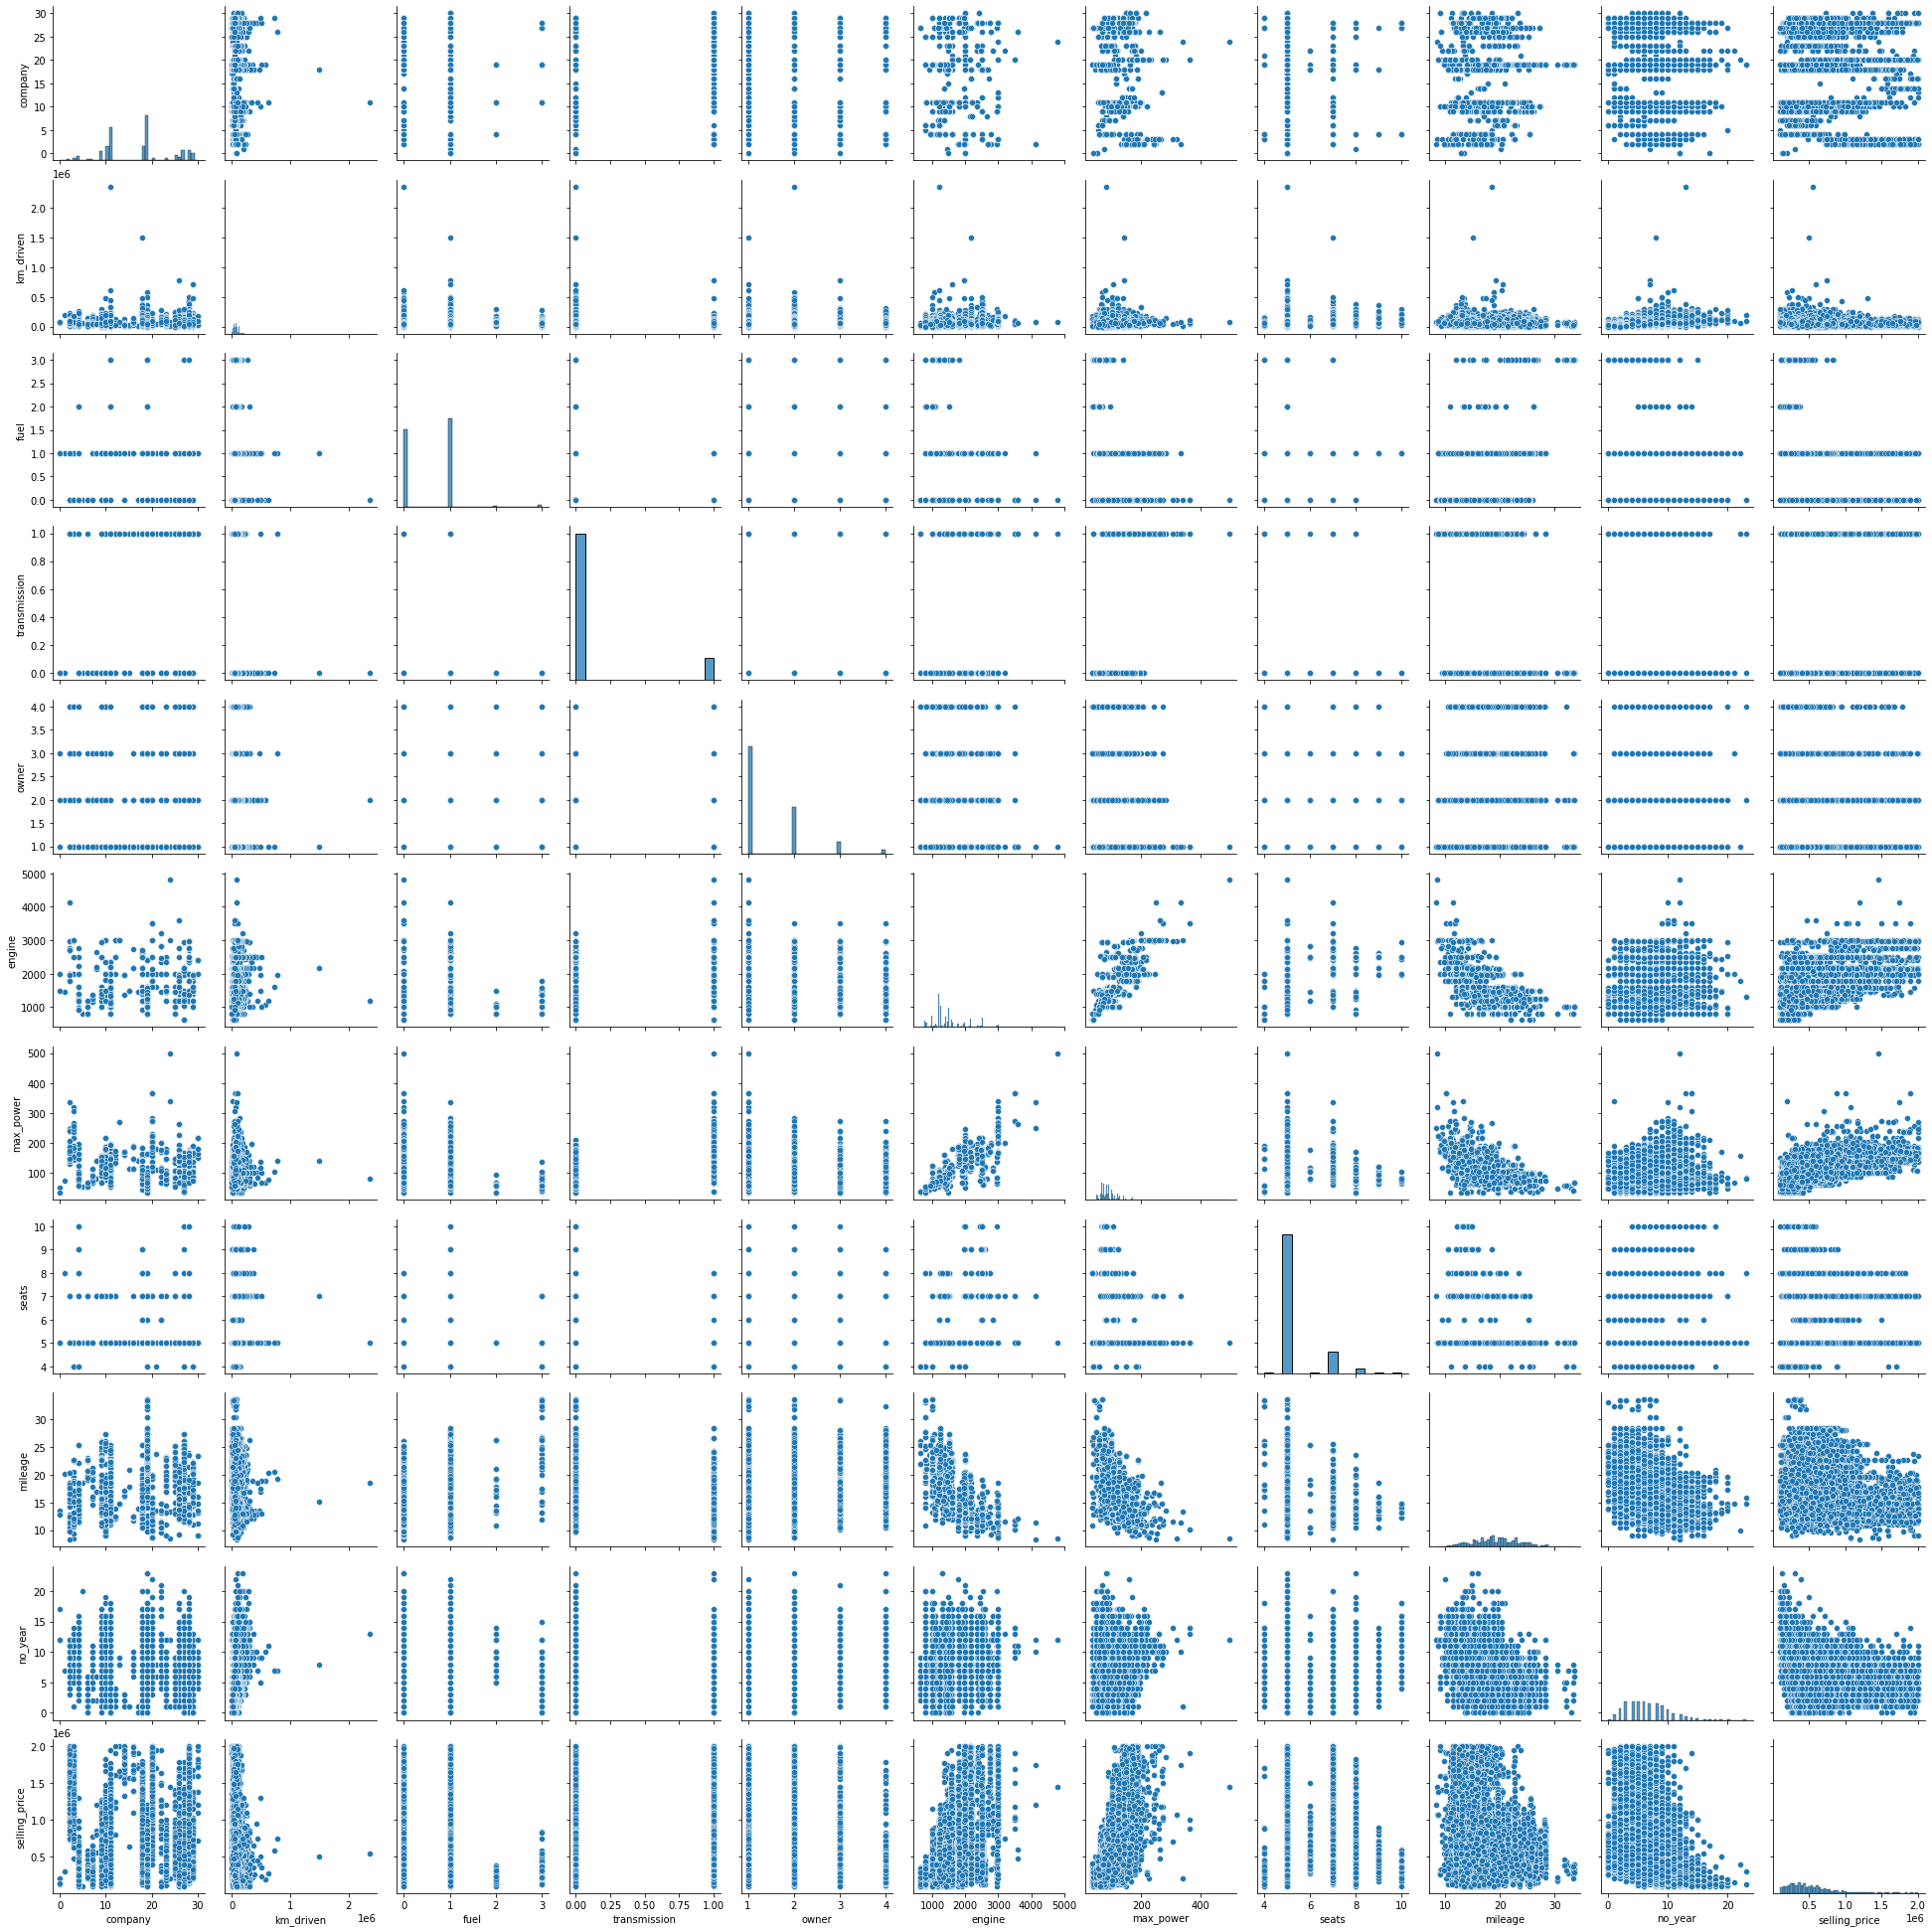

In [72]:
sns.pairplot(df)

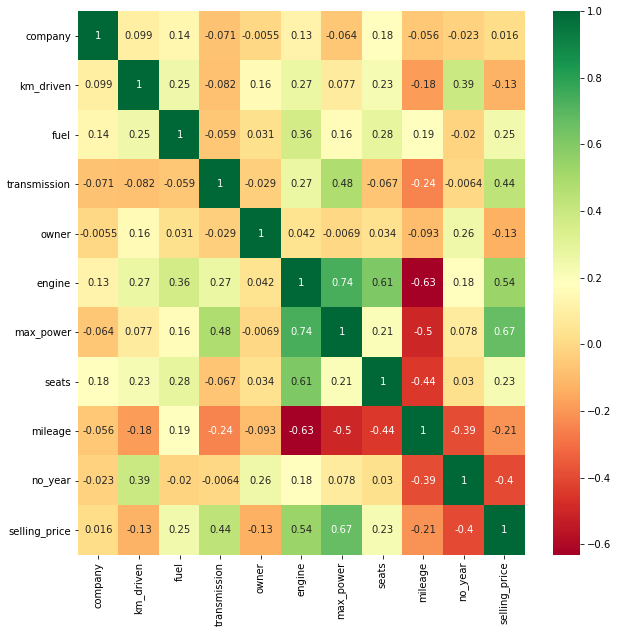

In [73]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### MODEL BUILDING

In [74]:
y=df['selling_price']
X=df.drop('selling_price',axis=1)

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#### LinearRegression

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy on Training set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

Accuracy on Training set:  0.7029717970661657
Accuracy on Testing set:  0.7092555321323069
		Error Table
Mean Absolute Error      :  144013.03247066826
Mean Squared  Error      :  40735692063.27681
Root Mean Squared  Error :  201830.85012771664
R Squared Error          :  0.7092555321323069


#### RandomForestRegressor

In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

reg_rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
reg_rf.fit(X_train, y_train)
y_pred= reg_rf.predict(X_test)
print("Accuracy on Traing set: ",reg_rf.score(X_train,y_train))
print("Accuracy on Testing set: ",reg_rf.score(X_test,y_test))

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

Accuracy on Traing set:  0.982320436166364
Accuracy on Testing set:  0.8759231335649103
		Error Table
Mean Absolute Error      :  86108.04934803087
Mean Squared  Error      :  17384189836.334877
Root Mean Squared  Error :  131849.11769266747
R Squared Error          :  0.8759231335649103


In [78]:
import pickle
DT_pkl_filename = 'models/Car-reg_rf.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(reg_rf, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

#### XGBoost

In [79]:
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
print("Accuracy on Traing set: ",model.score(X_train,y_train))
print("Accuracy on Testing set: ",model.score(X_test,y_test))

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

Accuracy on Traing set:  0.9671571597009089
Accuracy on Testing set:  0.8921495483540484
		Error Table
Mean Absolute Error      :  80988.38645540731
Mean Squared  Error      :  15110735620.71718
Root Mean Squared  Error :  122925.73213415155
R Squared Error          :  0.8921495483540484


c:\python\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
c:\python\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [80]:
import pickle
DT_pkl_filename = 'models/Car-XGBRegressor.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(model, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

In [81]:
df.head()

,company,km_driven,fuel,transmission,owner,engine,max_power,seats,mileage,no_year,selling_price
0,19,145500,1,0,1,1248,74.00,5,23.40,6,450000
1,26,120000,1,0,2,1498,103.52,5,21.14,6,370000
2,10,140000,0,0,3,1497,78.00,5,17.70,14,158000
3,11,127000,1,0,1,1396,90.00,5,23.00,10,225000
4,19,120000,0,0,1,1298,88.20,5,16.10,13,130000


In [82]:
# company 	km_driven 	fuel 	transmission 	owner 	engine 	max_power 	seats 	mileage 	no_year 	selling_price

In [83]:
df1 = np.array([[19,145500,1,0,1,1248,74.00,5,23.40,6]])
prediction = model.predict(df1)

print(prediction)

[449105.8]


In [84]:
df1 = np.array([[11,127000,1,0,1,1396,90.00,5,23.00,10]])
prediction = model.predict(df1)

print(prediction)

[308850.12]
